In [76]:
%pylab
%matplotlib inline

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [77]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
from astropy.io import fits
import os
import shutil
import pandas as pd
import sys
import numpy as np
import matplotlib
import matplotlib.lines as mlines

#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['text.usetex'] = True
import matplotlib as mpl

#mpl.style.use('classic')
#mpl.rcParams['errorbar.capsize'] = 3
import warnings

#warnings.filterwarnings("ignore")
#matplotlib.rcParams.update({'font.size': 28})
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from libs.mathFunctions import explaw
from libs.mathFunctions import fit_by_explaw

In [108]:
names = ['d_h_eon150','m_h_eon150','d_ib_732','m_ib_732','d_ib_1720','m_ib_1720',
        'd_ib_2015','m_ib_2015','d_mb_804','m_mb_804','d_mb_1354','m_mb_1354','d_mb_1640','m_mb_1640',
        'd_mb_2007','m_mb_2007','d_mb_eon183','m_mb_eon183']
#names = ['d_ib_732','m_ib_732']

cut_x = [80,80,80,80,80,80,40,40,30,30,40,40,30,30,40,40,100,100]
cut_y = [30,30,30,30,40,40,20,20,14,14,25,25,20,20,20,20,60,60]
#cut_x = [80,80]
#cut_y = [30,30]


# На 9-ое февраля: нет h_1237, т.к. всего лишь одна точка
#names = ['d_h_1237','m_h_1237']
#cut_x = [80,80]
#cut_y = [40,40]

In [90]:
def rotate_via_numpy(x, y, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    #print (x)
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])
    #print (m.T[:,0])
    #print (m)
    return np.array(m.T[:,0]), np.array(m.T[:,1])

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
h_eon150


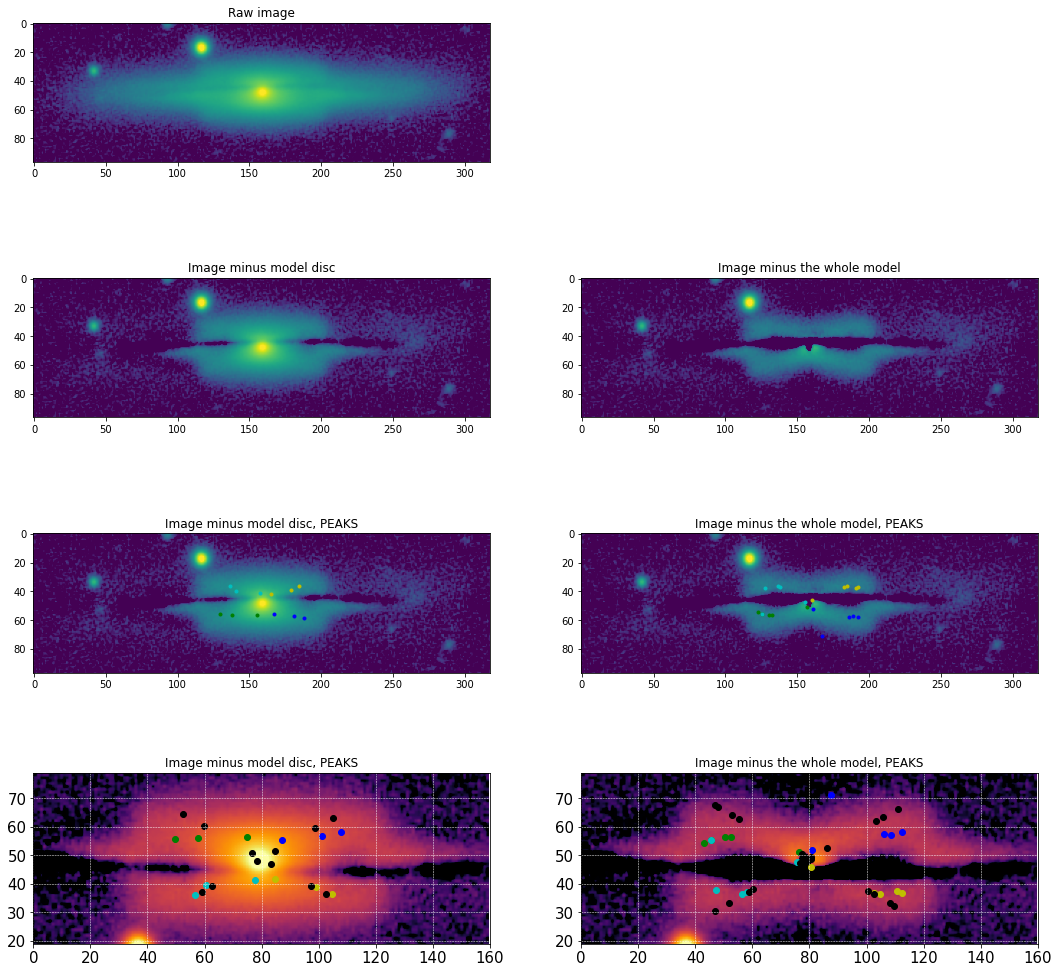

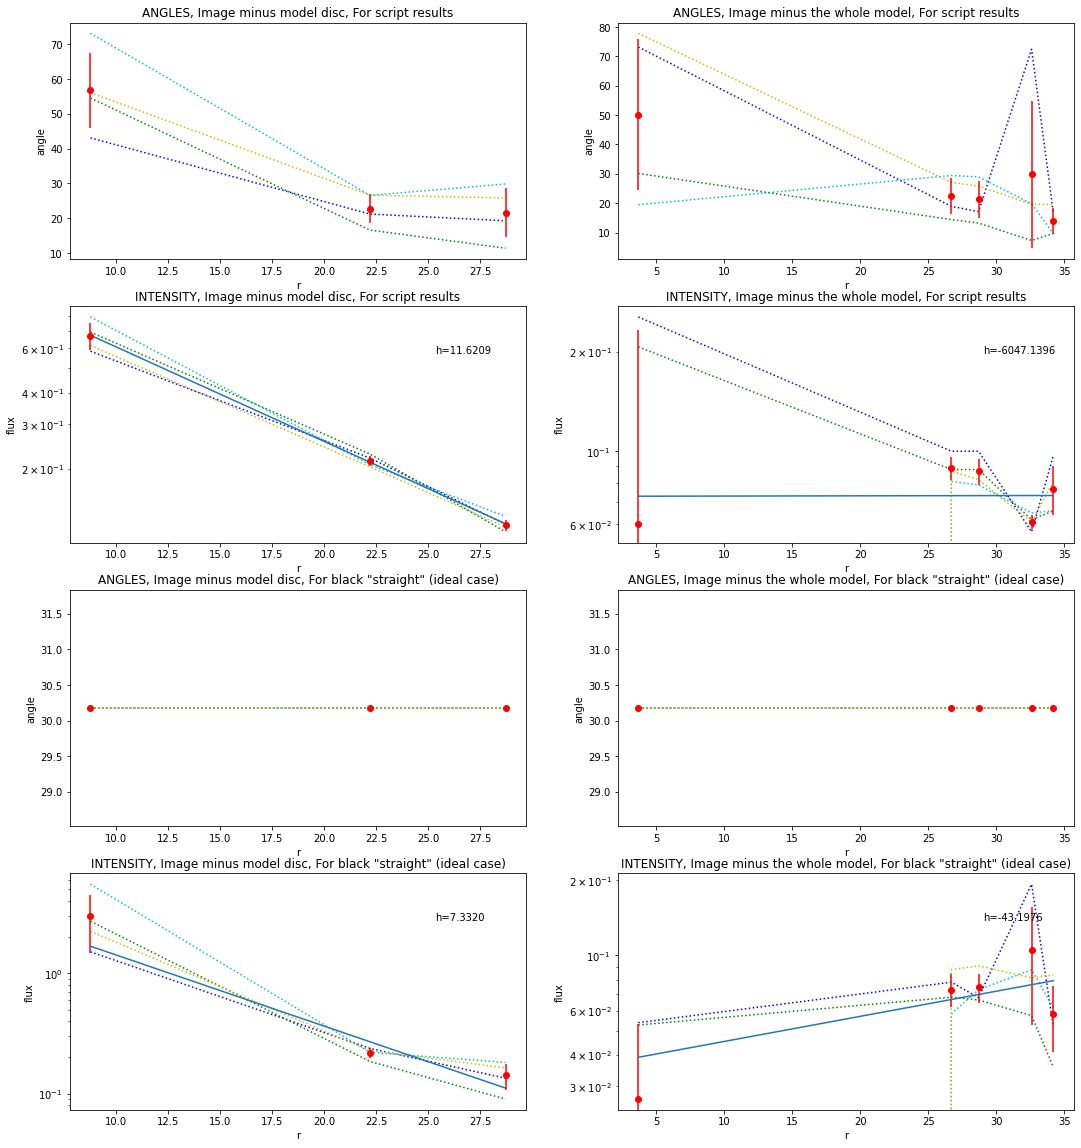

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ib_732


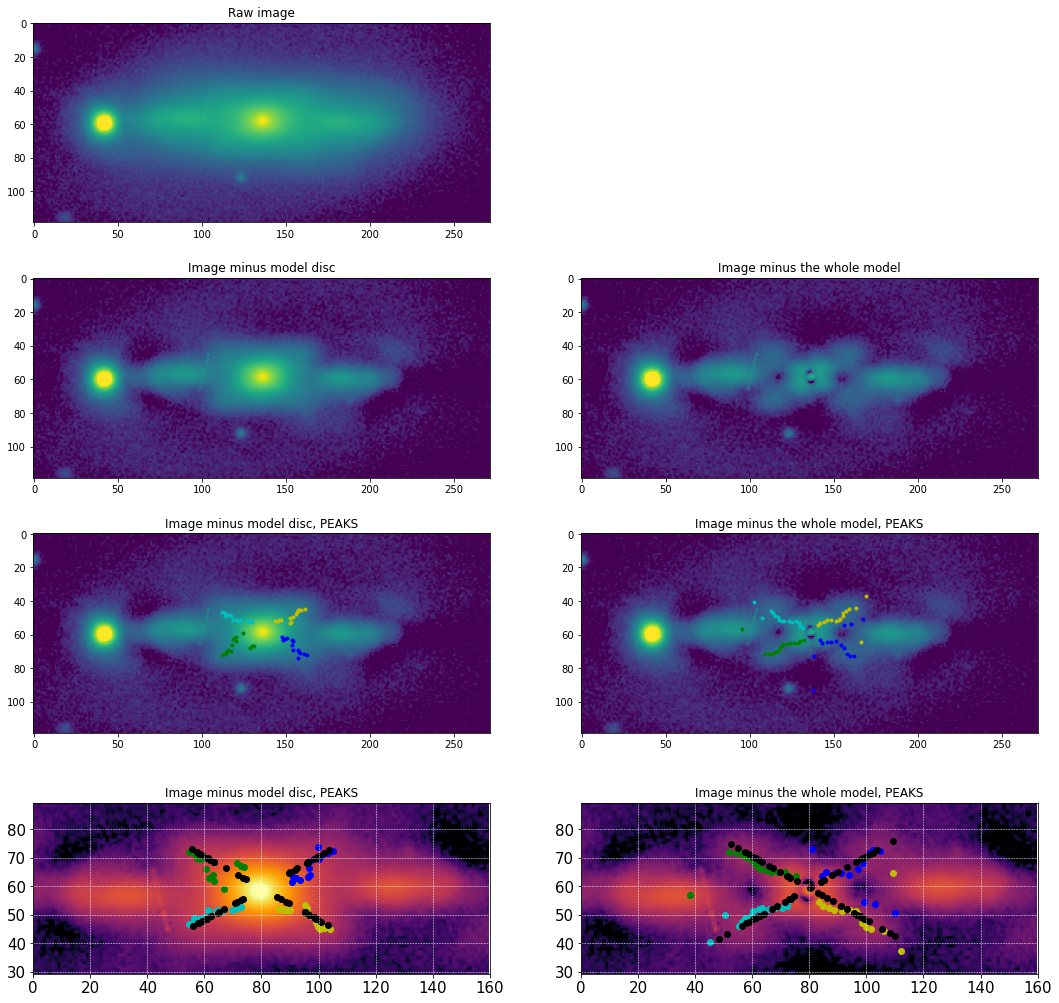

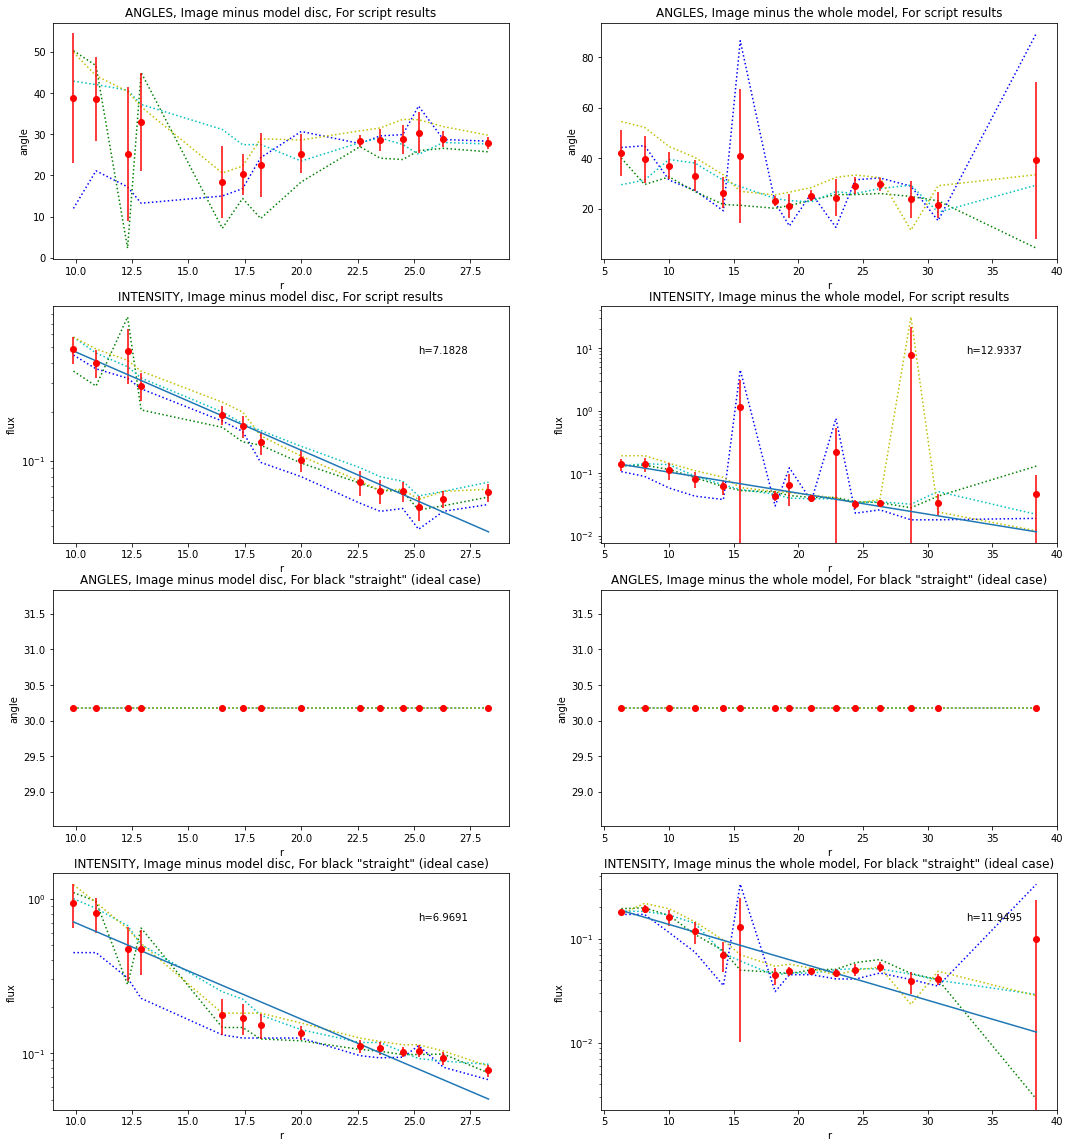

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ib_1720


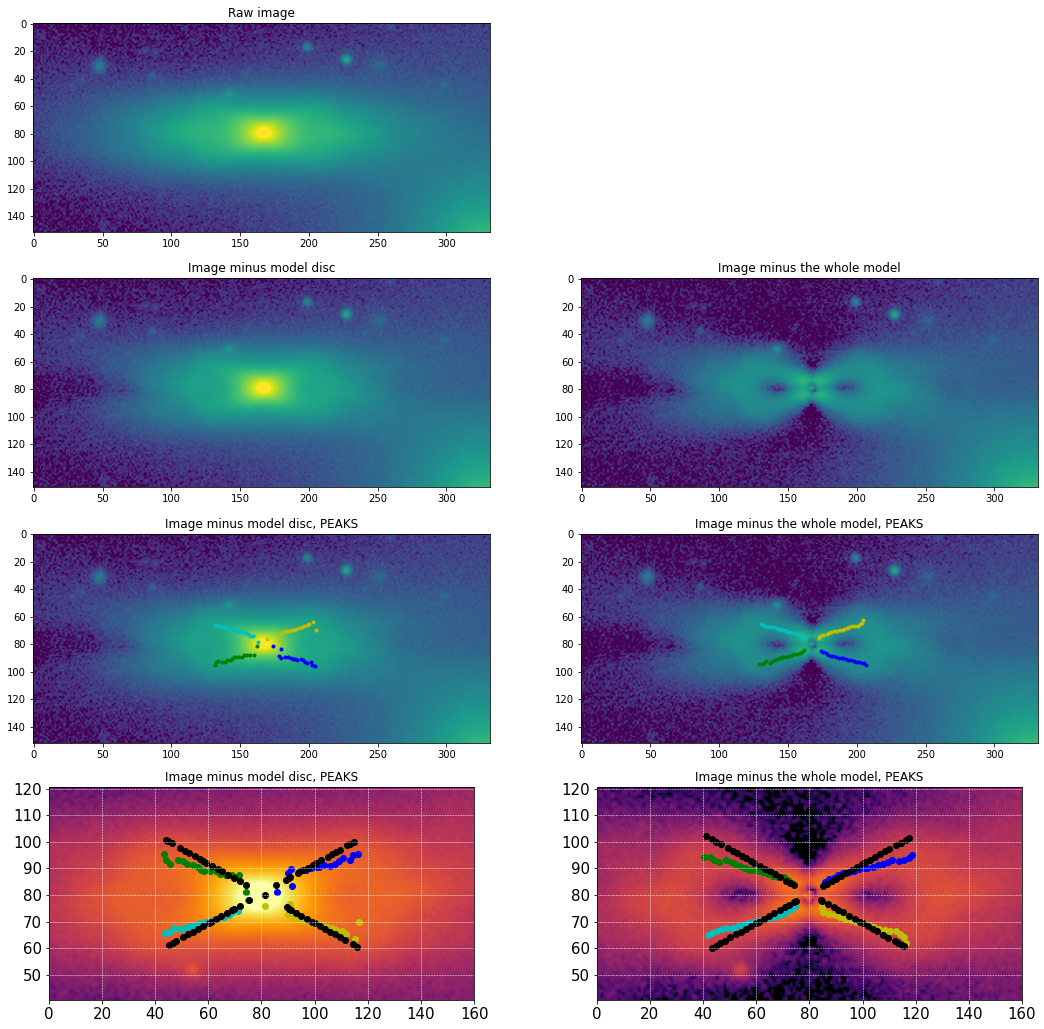

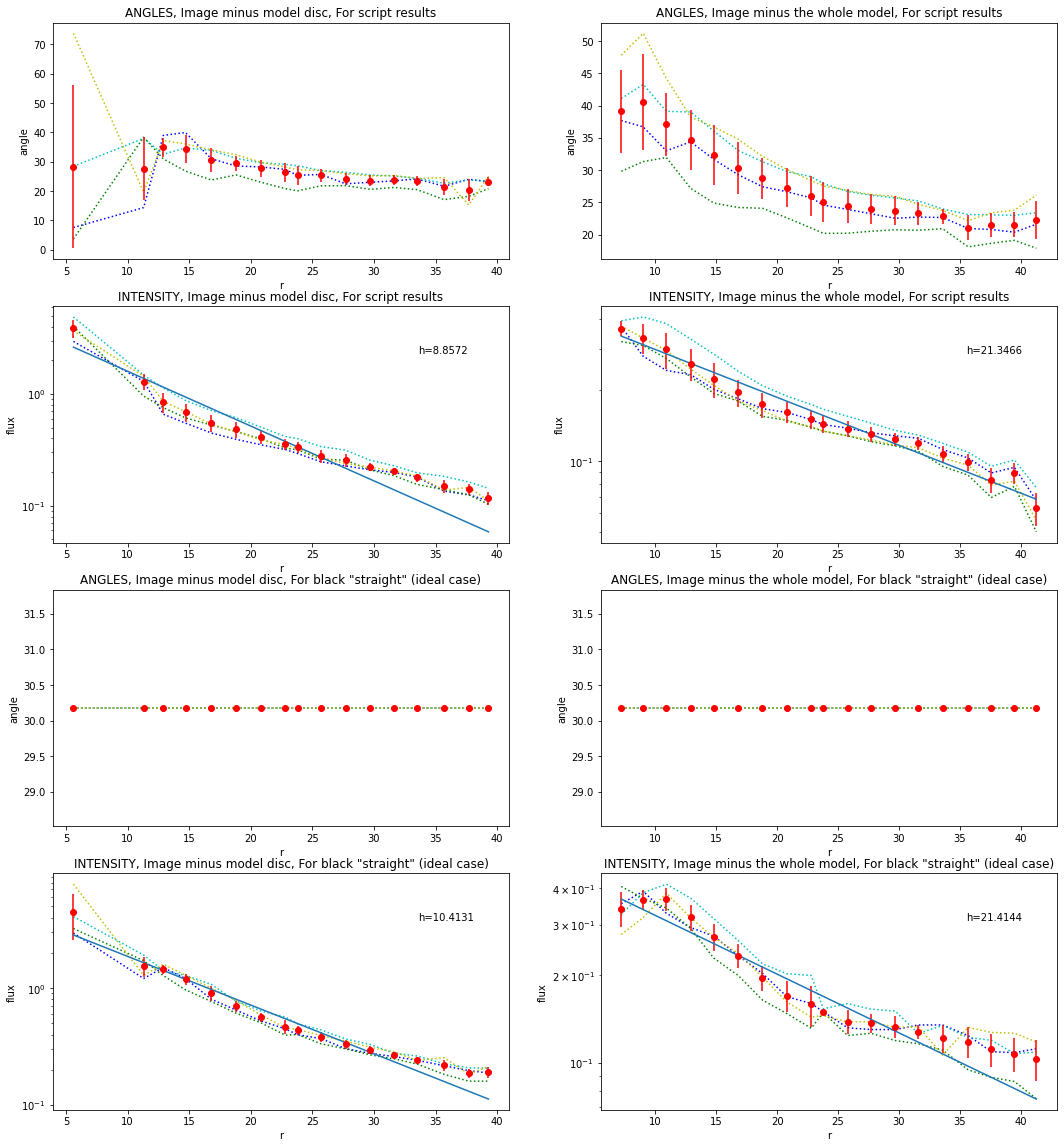

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ib_2015


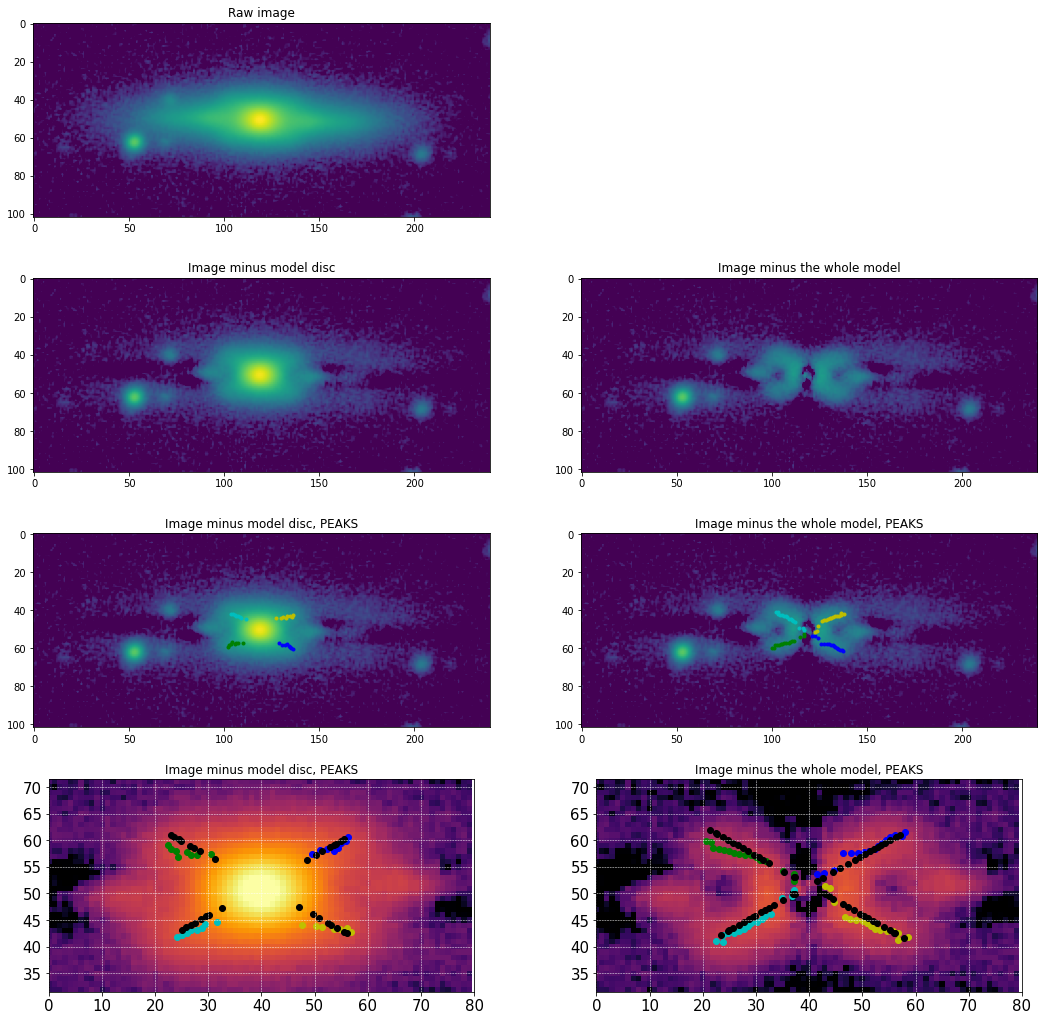

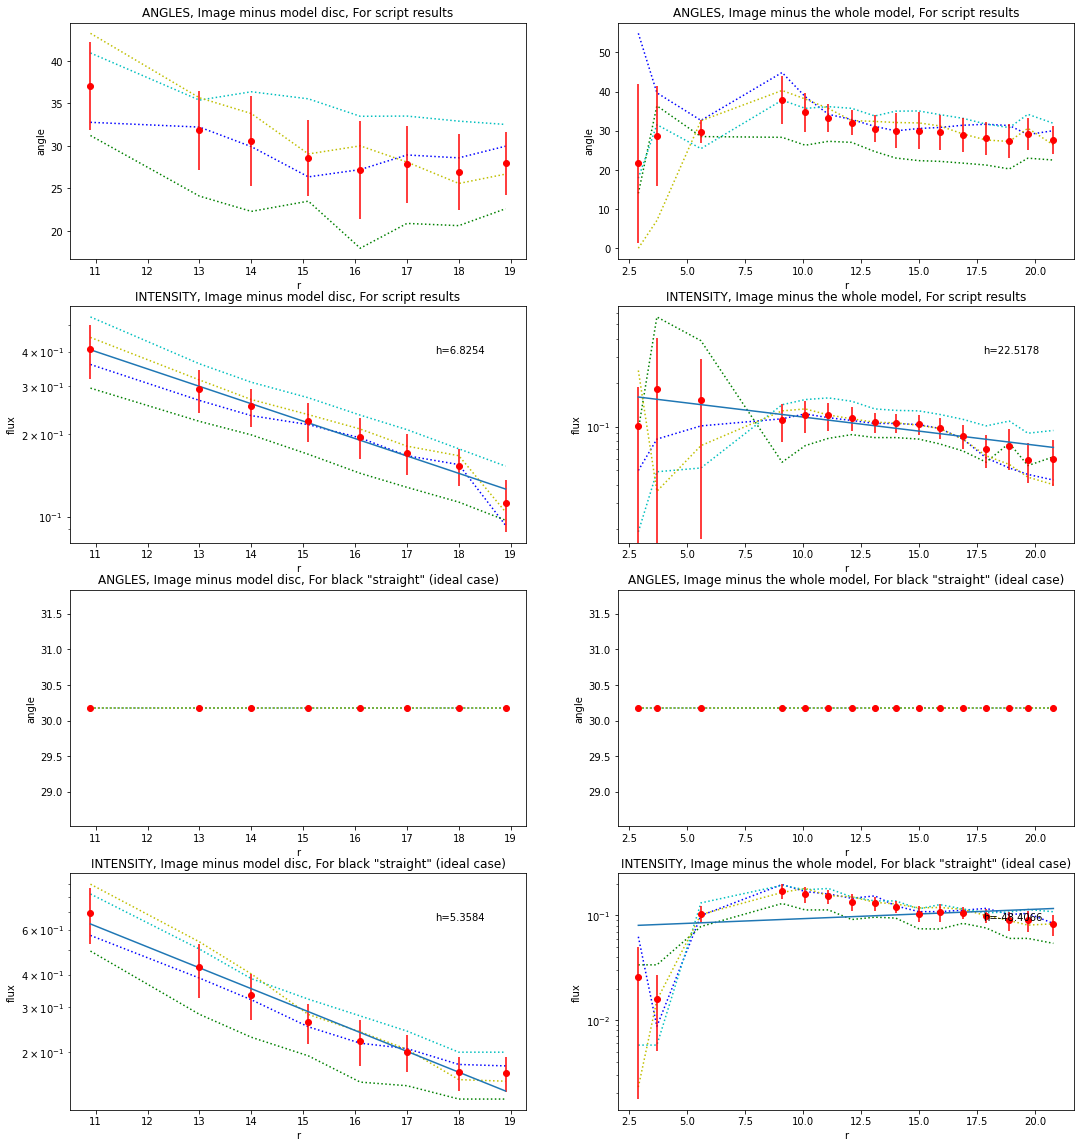

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
mb_804


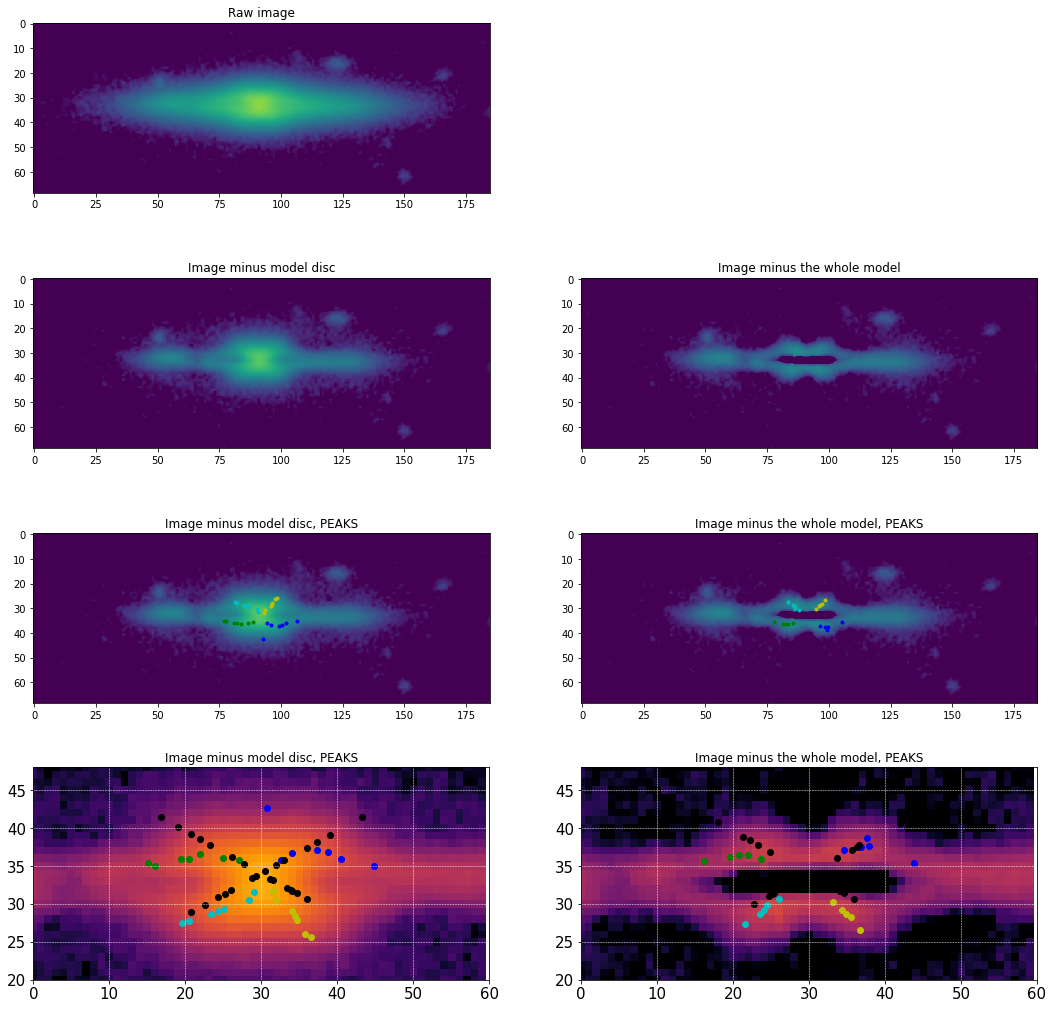

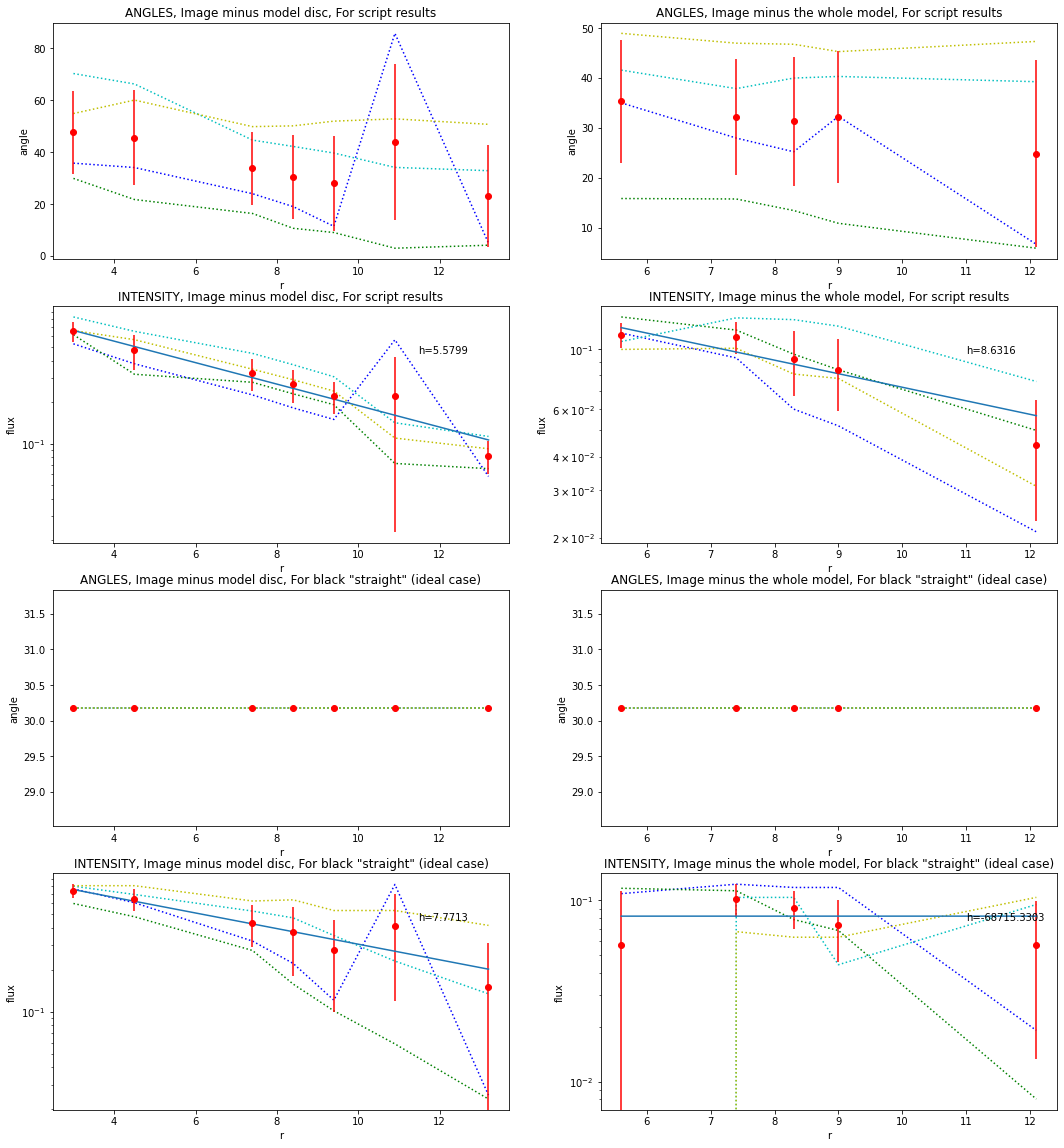

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
mb_1354


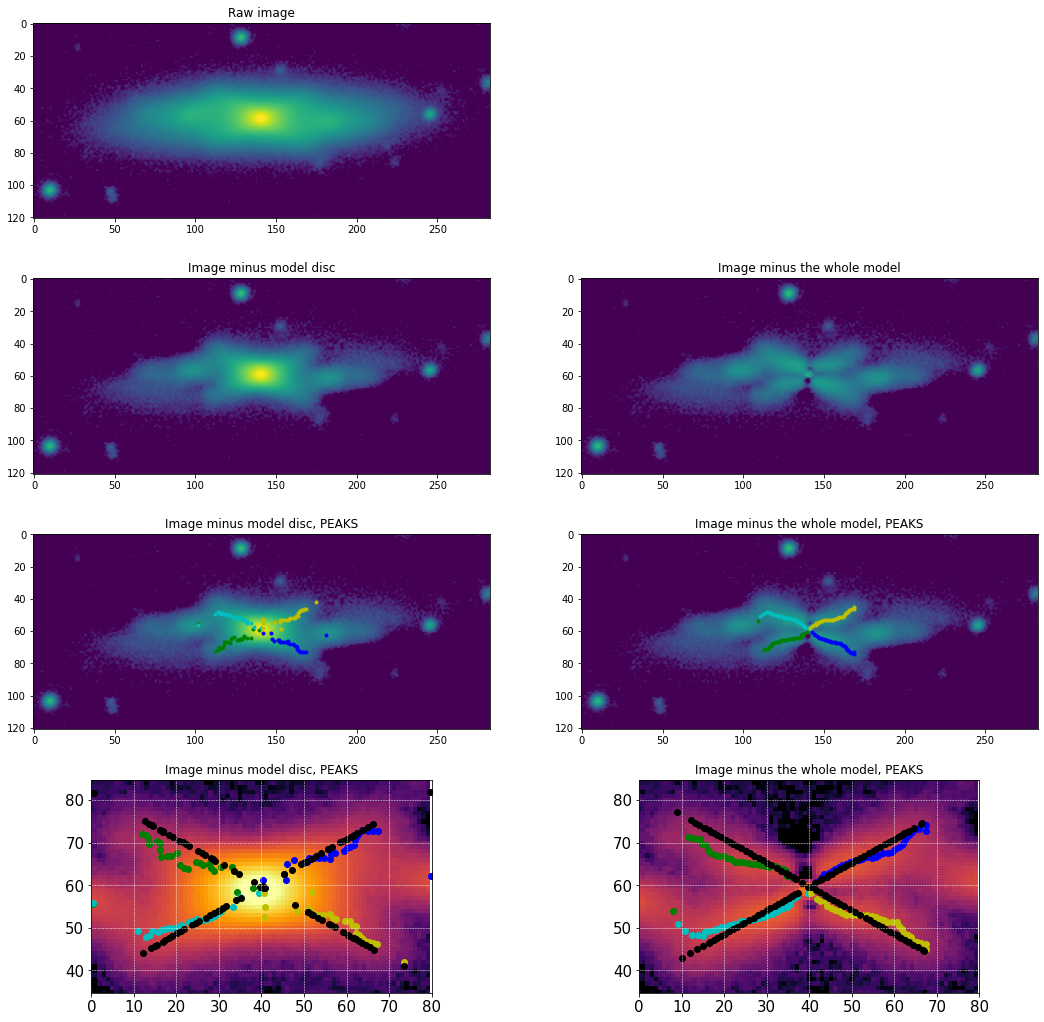

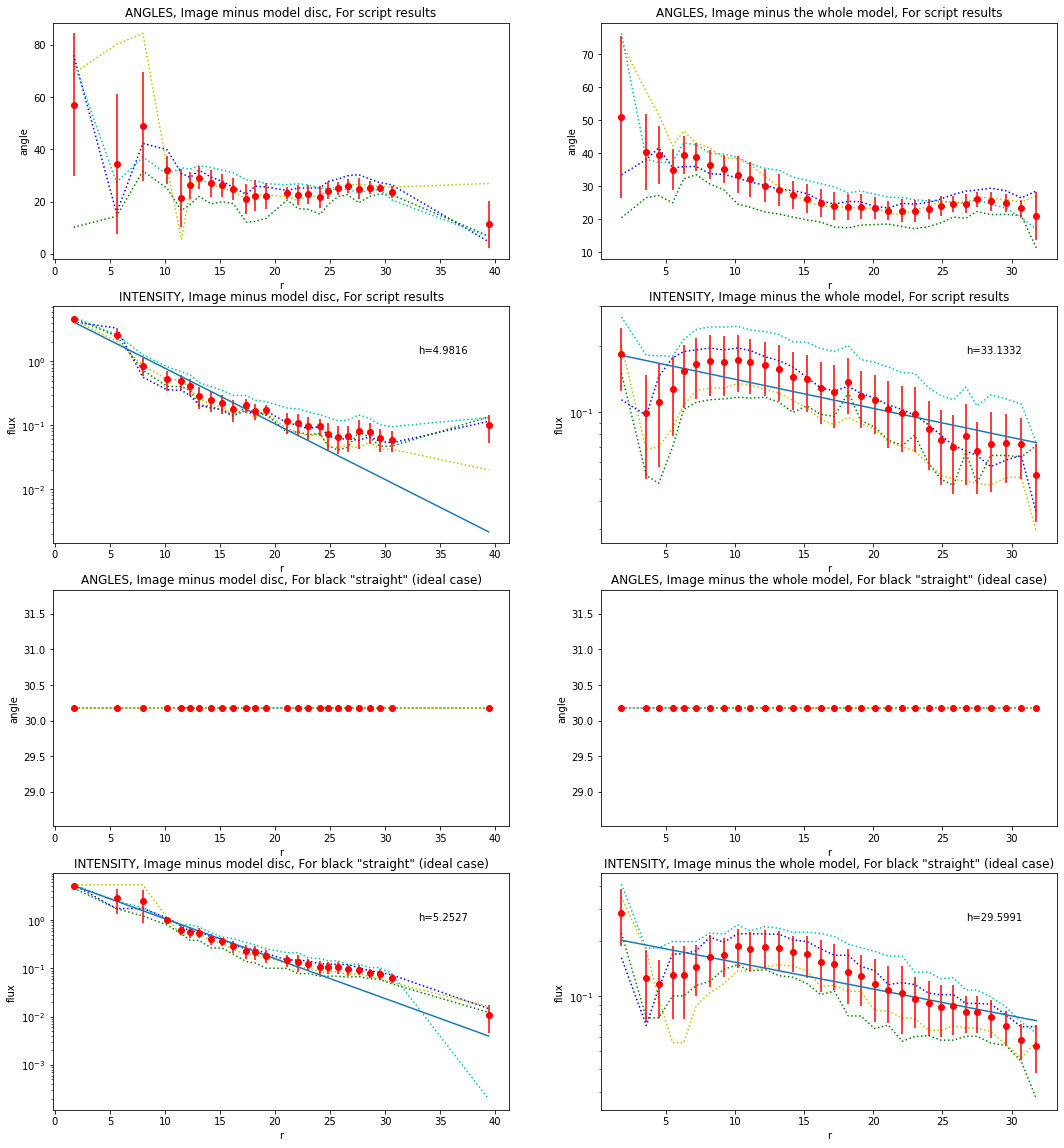

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
mb_1640


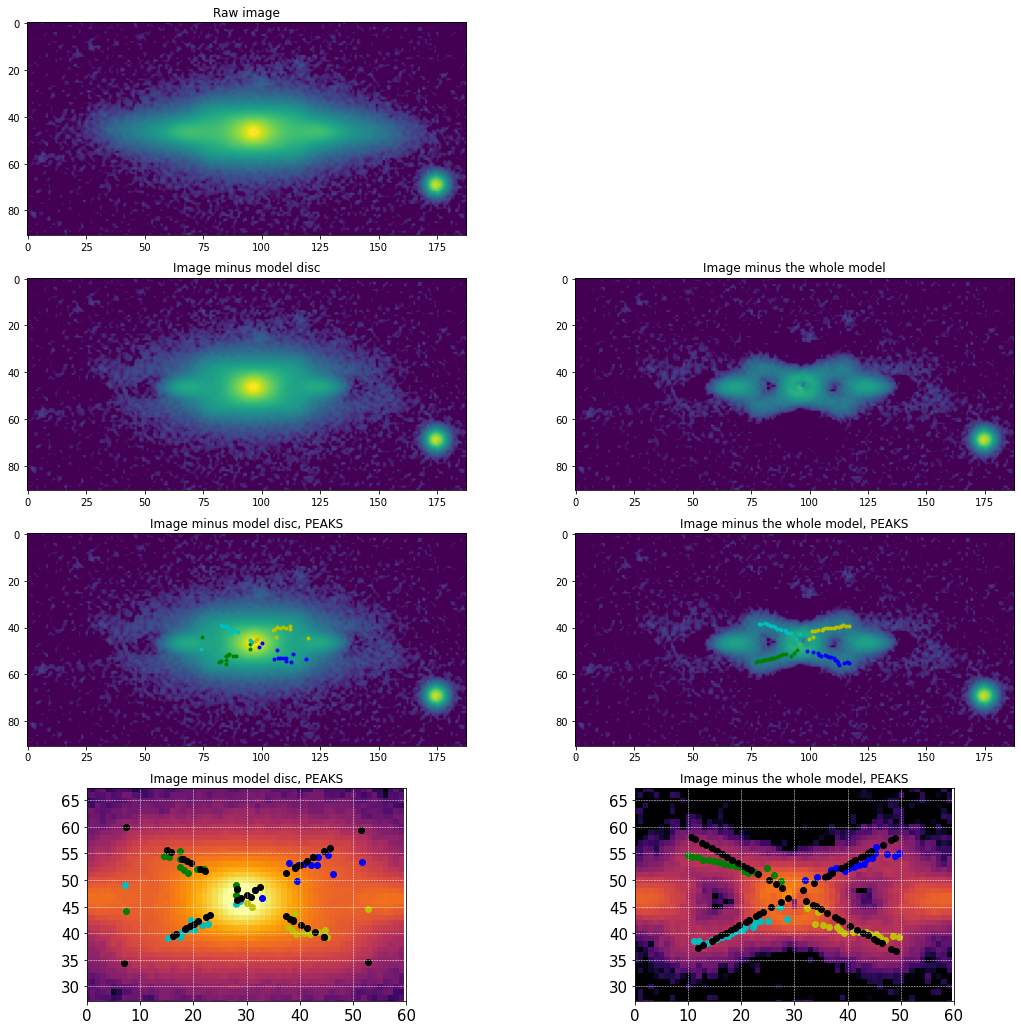

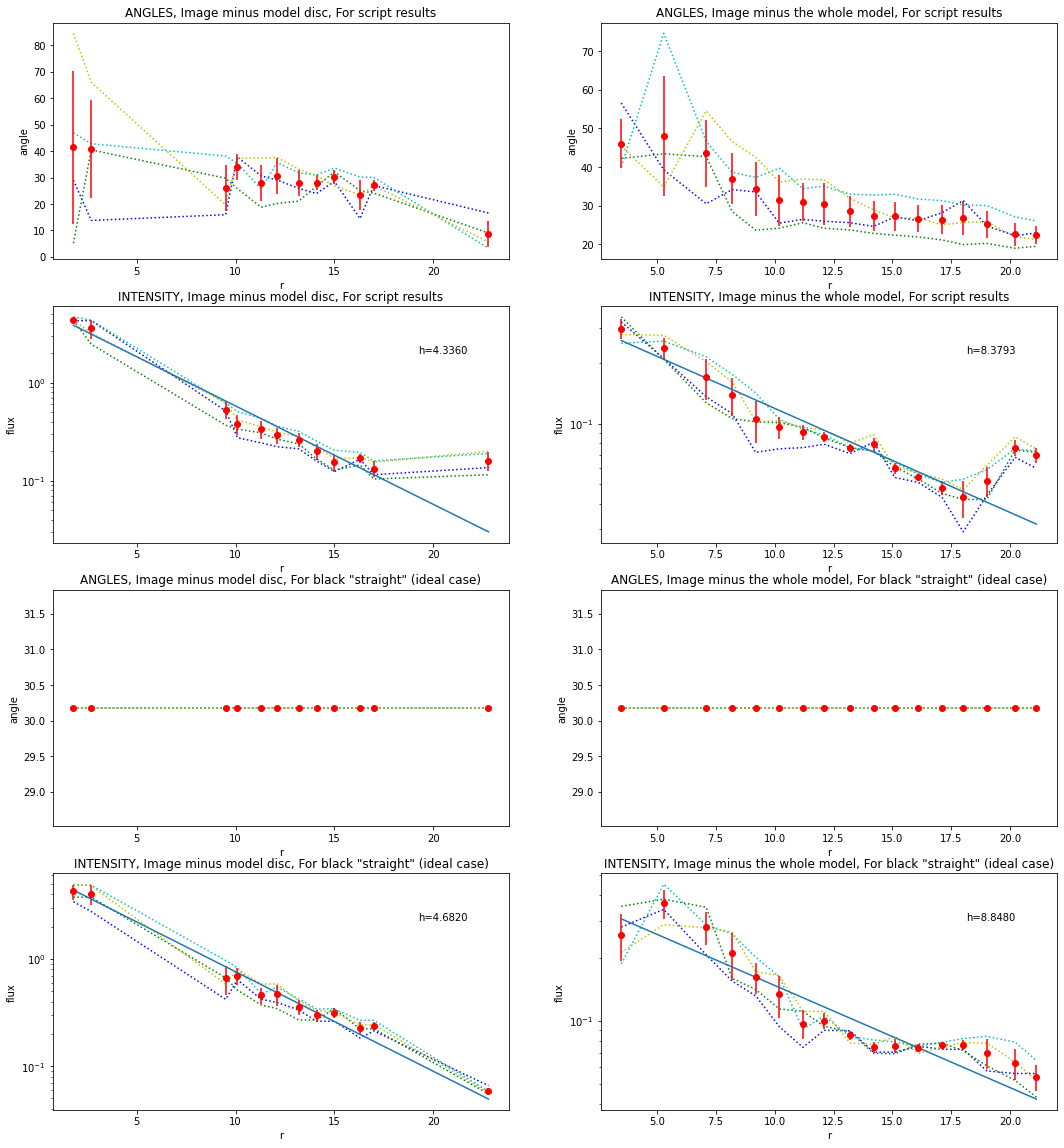

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
mb_2007


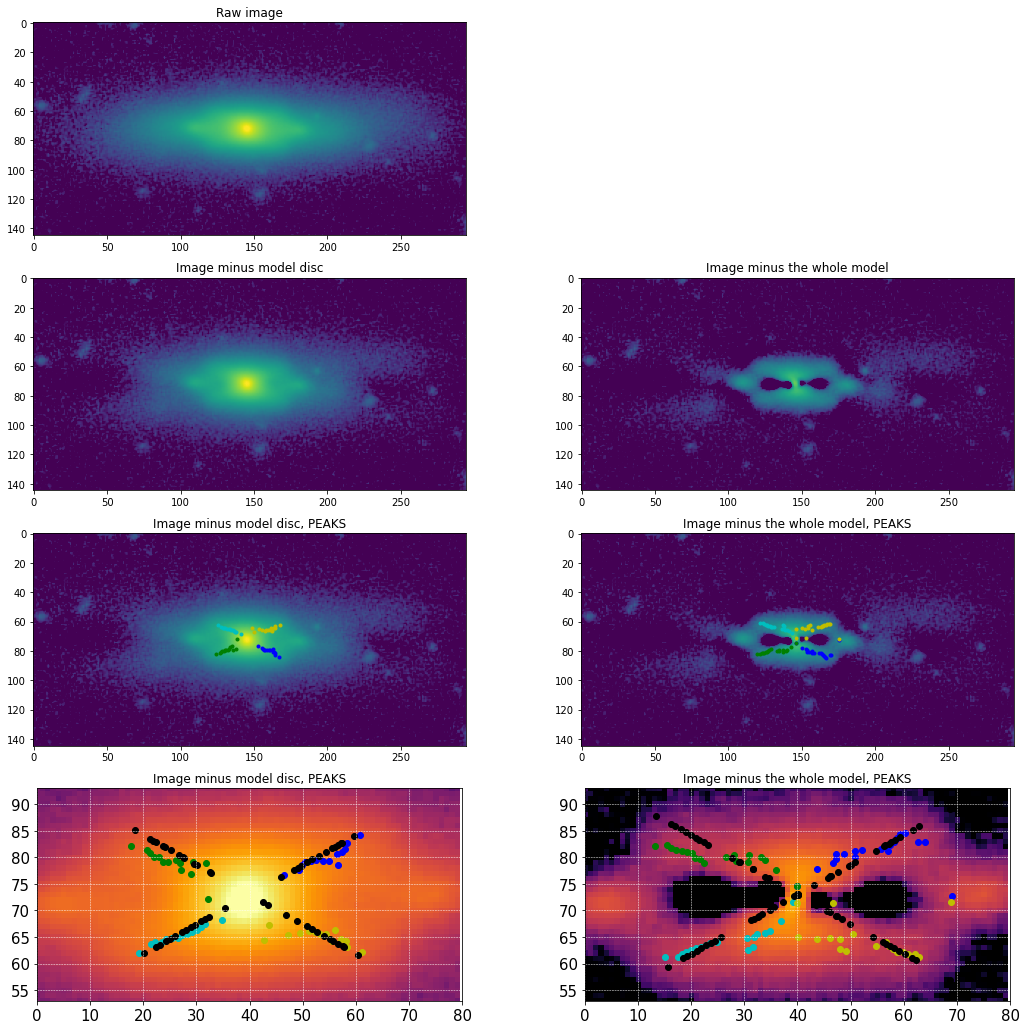

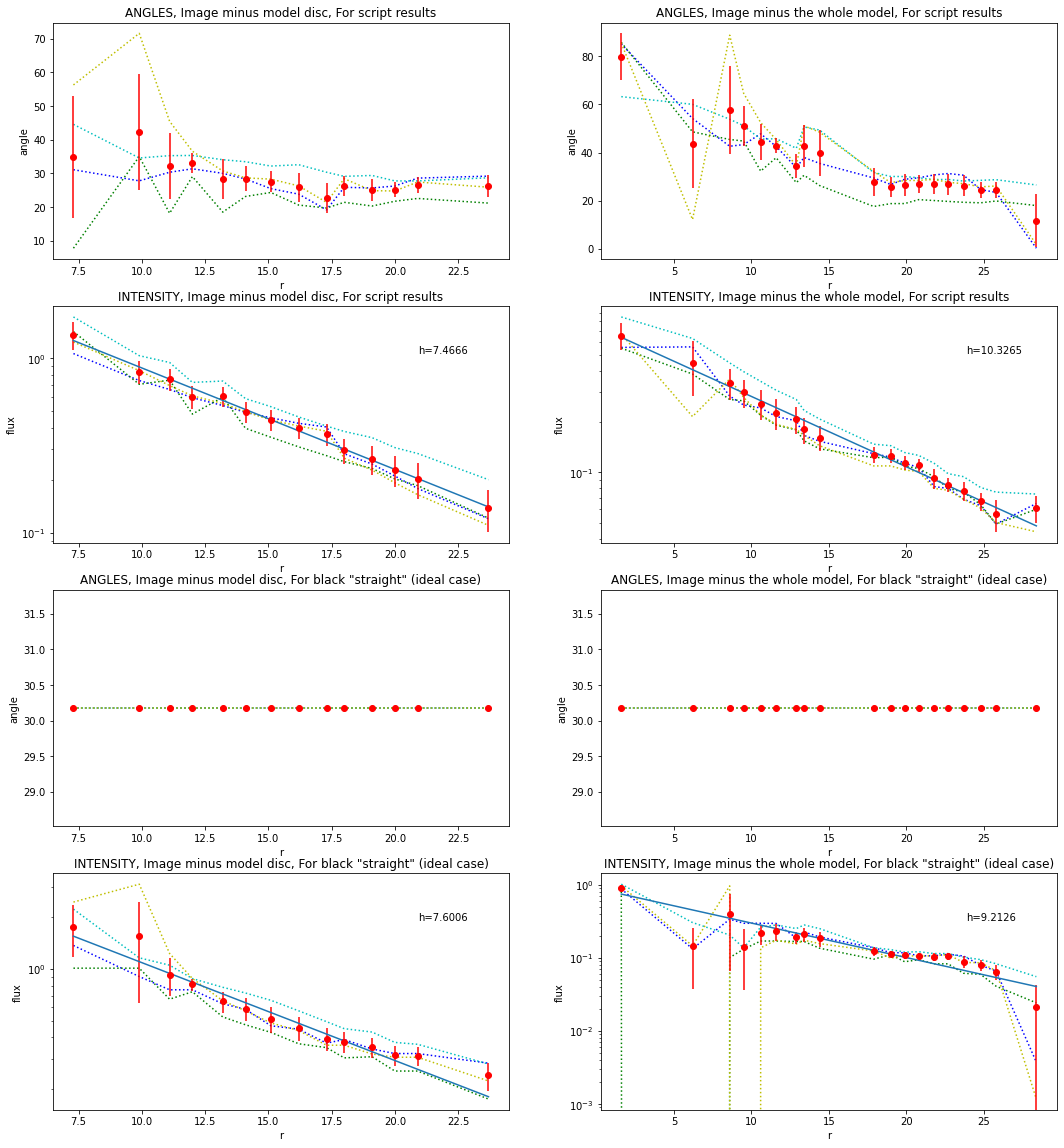

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
mb_eon183


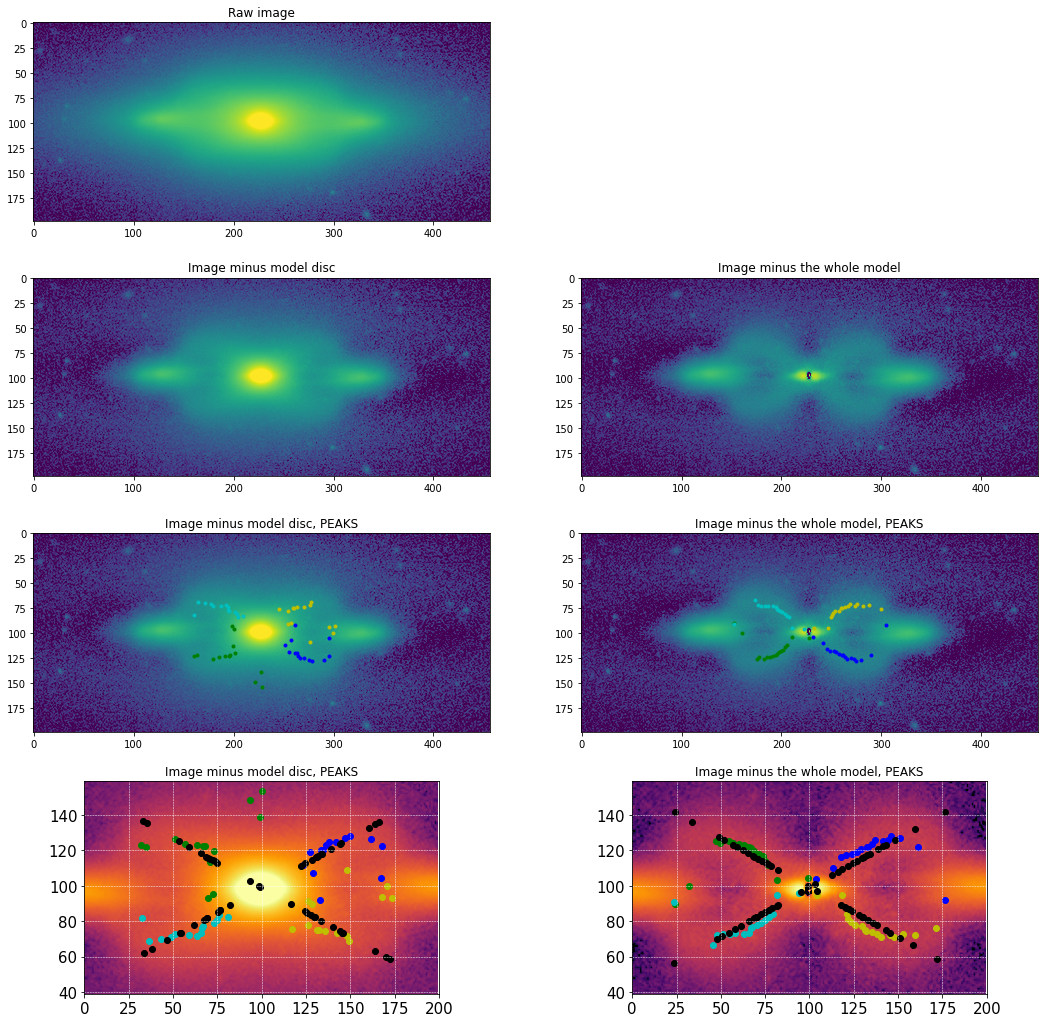

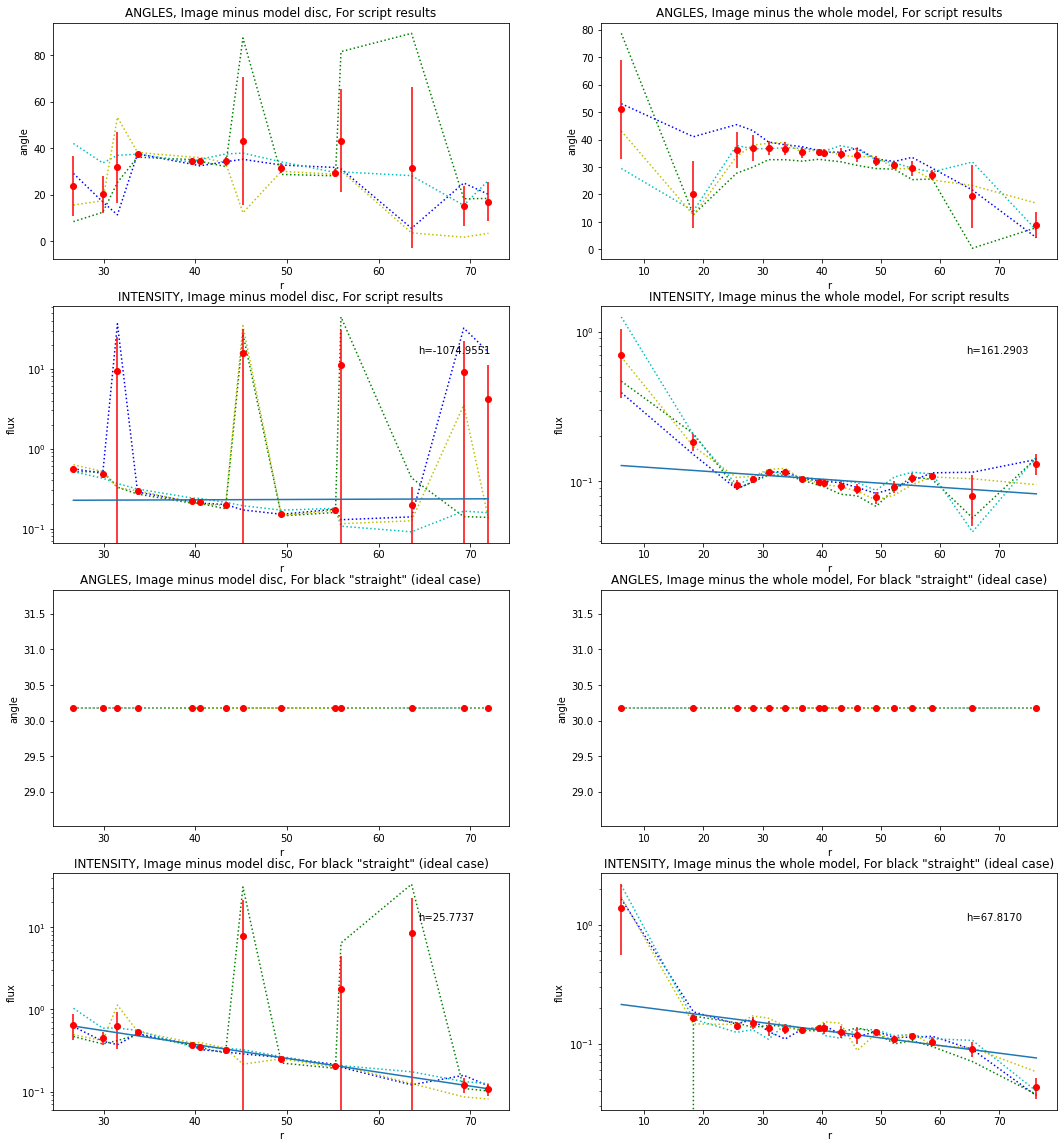

In [109]:
colors = ["b", "g", "c", "y"]
my_cmap = copy.copy(matplotlib.cm.get_cmap('inferno'))  # copy the default cmap
my_cmap.set_bad((0, 0, 0))
#matplotlib.rcParams.update({'font.size': 18})
ii = 0
for i in range(0,len(names)):
    ii += 1
    mode = names[i].split('_')[0] # Либо 'd', либо 'm' 
    name_gal = names[i].split('_')[1] + '_' + names[i].split('_')[2]
    if mode == 'd':   
        path_image_minus_modeldisc = './images/image_minus_modeldisc_{}.fits'.format(name_gal)
        hdulist_image_d  = fits.open(path_image_minus_modeldisc)
        data_image_d = hdulist_image_d[0].data  
    if mode == 'm':
        path_image_minus_model = './images/image_minus_model_{}.fits'.format(name_gal)
        hdulist_image_m  = fits.open(path_image_minus_model)
        data_image_m = hdulist_image_m[0].data
        
    path_image = './images/image_{}.fits'.format(name_gal)    
    hdulist_image  = fits.open(path_image)
    data_image = hdulist_image[0].data
    
    path_angles_1 = './result/{}/angles.dat'.format(names[i])
    path_intens_1 = './result/{}/intensities.dat'.format(names[i])
    path_coords_1 = './result/{}/coord_xy_peaks.dat'.format(names[i])
    path_config = './configs/config{}.dat'.format(names[i])
                                       
    # Первый набор данных -- координаты точек, углы и интенсивности для точек, получаемые программой.
    # У каждой галактики эти данные записаны в файлах coord_xy_peaks.dat, angles.dat, intensities.dat.
    
    radii = np.loadtxt(path_angles_1, usecols=[0], comments='#')                                    
    angles_1 = np.loadtxt(path_angles_1, usecols=np.arange(1,7), comments='#')  
    intens_1 = np.loadtxt(path_intens_1, usecols=np.arange(1,7), comments='#') 
    coords_1 = np.loadtxt(path_coords_1, usecols=np.arange(1,9), comments='#') 
    
    if mode == 'd': 
        radii_d = np.copy(radii)
        angles_1_d = np.copy(angles_1)
        intens_1_d = np.copy(intens_1)
        coords_1_d = np.copy(coords_1)
    if mode == 'm':
        radii_m = np.copy(radii)
        angles_1_m = np.copy(angles_1)
        intens_1_m = np.copy(intens_1)
        coords_1_m = np.copy(coords_1)
    
    # Второй набор тех же данных, но для чёрной "прямой", состоящей из чёрных точек. 
            
            # Найдём координаты центра изображения и эллиптичность эллипсов
    with open(path_config) as file:
        for line in file:
            if line.find('x_center:') != -1:
                xcen = float(line.split()[1])
            if line.find('y_center:') != -1:
                ycen = float(line.split()[1])
            if line.find('ell_ellipticity:') != -1:
                ell = float(line.split()[1])
    ell_l = []
    ell_l.append(ell)
    axis_ratio = np.ones(len(ell_l)) - ell_l 
    signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
    x0 = cut_x[i]
    y0 = ycen    
    k_ideal = 0.581458 
    ang = 1 
    
    if mode == 'd':       
        data_intens = data_image_d[:,int(xcen-cut_x[i]):int(xcen+cut_x[i])]
    if mode == 'm':
        data_intens = data_image_m[:,int(xcen-cut_x[i]):int(xcen+cut_x[i])]
    
    angles_2 = np.zeros((radii.size,6))
    coords_2 = np.zeros((radii.size,8))
    intens_2 = np.zeros((radii.size,6))
    angles_2[:, 0:4] = np.tan(angles_1[:, 0:4]*np.pi/180)
    for j in range (1,5): 
        x = radii/np.sqrt(1 + angles_2[:,j-1]**2/axis_ratio[0]**2)
        y = angles_2[:,j-1]*x
        x_ideal = np.copy(x)
        y_ideal = x_ideal*k_ideal
        x, y = rotate_via_numpy(x, y, np.pi/180.0*ang)
        x_ideal, y_ideal = rotate_via_numpy(x_ideal, y_ideal, np.pi/180.0*ang)
        x_ideal = x0 + signs_xy[j-1][0]*x_ideal
        y_ideal = y0 + signs_xy[j-1][1]*y_ideal  
        x = x0 + signs_xy[j-1][0]*x
        y = y0 + signs_xy[j-1][1]*y
        coords_2[:,j-1], coords_2[:,j+3] = np.transpose(x_ideal), np.transpose(y_ideal)
    #    for jj in range(len(x_ideal)):
            # x = x0 - xcen  + x
    #        intens_2[jj][j-1] = data_intens[int(coords_2[jj][j-1])][int(coords_2[jj][j+3])]
    #np.savetxt("filename.txt", coords_2, newline=" ")
    for jj1 in range (1,5):
        for jj in range(len(x_ideal)):
            intens_2[jj,jj1-1] = data_intens[int(coords_2[jj,jj1+3])][int(coords_2[jj,jj1-1])]
            if intens_2[jj,jj1-1] < 0:
                intens_2[jj,jj1-1] = 0.0
    angles_2[:,0:4] = np.arctan(k_ideal)*180/pi 
       
    for jj in range(len(x_ideal)):
        intens_2[jj,4] = np.average(intens_2[jj,0:4]) 
        intens_2[jj,5] = np.std(intens_2[jj,0:4]) 
        angles_2[jj,4] = np.average(angles_2[jj,0:4]) 
        angles_2[jj,5] = np.std(angles_2[jj,0:4]) 
    
    if mode == 'd': 
        angles_2_d = np.copy(angles_2)
        intens_2_d = np.copy(intens_2)
        coords_2_d = np.copy(coords_2)
    if mode == 'm':
        angles_2_m = np.copy(angles_2)
        intens_2_m = np.copy(intens_2)
        coords_2_m = np.copy(coords_2)
                                
    if ii == 2:
        
        # Построение рисунков ----------------------
        
        print('=*'*50)
        print(name_gal)
                                 
        fig = plt.figure(figsize=[18,18])
                                     
        plt.subplot(4, 2, 1)
        plt.imshow(data_image, norm=SymLogNorm(linthresh=0.001,vmin=0.005,vmax=5))
        plt.title('Raw image')
    
        plt.subplot(4, 2, 3)
        plt.imshow(data_image_d, norm=SymLogNorm(linthresh=0.001,vmin=0.005,vmax=5))
        plt.title('Image minus model disc')
    
        plt.subplot(4, 2, 4)
        plt.imshow(data_image_m, norm=SymLogNorm(linthresh=0.001,vmin=0.005,vmax=5))
        plt.title('Image minus the whole model')
    
        plt.subplot(4, 2, 5)
        plt.imshow(data_image_d, norm=SymLogNorm(linthresh=0.001,vmin=0.005,vmax=5))
        for lobe_number in range(0, 4):
            plt.plot(coords_1_d[:,lobe_number], coords_1_d[:,lobe_number+4], color=colors[lobe_number], 
                     marker='o', linestyle="", markersize=3.0)
        plt.title('Image minus model disc, PEAKS')  
                                     
        plt.subplot(4, 2, 6)
        plt.imshow(data_image_m, norm=SymLogNorm(linthresh=0.001,vmin=0.005,vmax=5))
        for lobe_number in range(0, 4):
            plt.plot(coords_1_m[:,lobe_number], coords_1_m[:,lobe_number+4], color=colors[lobe_number], 
                     marker='o', linestyle="", markersize=3.0)
        plt.title('Image minus the whole model, PEAKS')
                                     
        plt.subplot(4, 2, 7)
        plt.imshow(data_image_d[:,int(xcen-cut_x[i]):int(xcen+cut_x[i])], 
                                      cmap=my_cmap, origin="lower", norm=LogNorm(vmin=0.003, vmax=3))
        plt.grid(color='w', linestyle='--', linewidth=0.5)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        for lobe_number in range(0, 4):
            x = coords_1_d[:,lobe_number] 
            y = coords_1_d[:,lobe_number+4]
           # x, y = rotate_via_numpy(x, y, np.pi/180.0*ang) 
            x = x0 - xcen  + x
           # y = y0 + signs_xy[j-1][1]*y
            plt.scatter(x, y, color=colors[lobe_number])
            plt.scatter(coords_2_d[:,lobe_number], coords_2_d[:,lobe_number+4], color="k")
        plt.gca().set_aspect("equal")
        plt.xlim([-cut_x[i]+x0, cut_x[i]+x0])
        plt.ylim([-cut_y[i]+y0, cut_y[i]+y0])
        plt.title('Image minus model disc, PEAKS')
                                     
        plt.subplot(4, 2, 8)
        plt.imshow(data_image_m[:,int(xcen-cut_x[i]):int(xcen+cut_x[i])], 
                                      cmap=my_cmap, origin="lower", norm=LogNorm(vmin=0.003, vmax=3))
        plt.grid(color='w', linestyle='--', linewidth=0.5)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        for lobe_number in range(0, 4):
            x = coords_1_m[:,lobe_number] 
            y = coords_1_m[:,lobe_number+4]
            x = x0 - xcen  + x
            plt.scatter(x, y, color=colors[lobe_number])
            plt.scatter(coords_2_m[:,lobe_number], coords_2_m[:,lobe_number+4], color="k")
        plt.gca().set_aspect("equal")
        plt.xlim([-cut_x[i]+x0, cut_x[i]+x0])
        plt.ylim([-cut_y[i]+y0, cut_y[i]+y0])
        plt.title('Image minus the whole model, PEAKS')
        
        plt.savefig("./result/picture_peaks_{}.png".format(name_gal))
        plt.show()
    
        fig = plt.figure(figsize=[18,20])
                                  
        plt.subplot(4, 2, 1)
        for lobe_number in range(0, 4):
            plt.plot(radii_d, angles_1_d[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_d, y=angles_1_d[:,4], yerr=angles_1_d[:,5], fmt="ro")
        plt.xlabel("r")
        plt.ylabel("angle")
        plt.title('ANGLES, Image minus model disc, For script results')
                                     
        plt.subplot(4, 2, 2)
        for lobe_number in range(0, 4):
            plt.plot(radii_m, angles_1_m[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_m, y=angles_1_m[:,4], yerr=angles_1_m[:,5], fmt="ro")
        plt.xlabel("r")
        plt.ylabel("angle")
        plt.title('ANGLES, Image minus the whole model, For script results')
                                     
        plt.subplot(4, 2, 3)
        central_value, exp_scale = fit_by_explaw(radii_d, intens_1_d[:,4], intens_1_d[:,5])
        for lobe_number in range(0, 4):
            plt.plot(radii_d, intens_1_d[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_d, y=intens_1_d[:,4], yerr=intens_1_d[:,5], fmt="ro")
        plt.plot(radii_d, explaw([central_value, exp_scale], radii_d), linestyle="solid")
        plt.annotate(text="h=%1.4f" % exp_scale, xy=(0.8, 0.8), xycoords="axes fraction")
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.title('INTENSITY, Image minus model disc, For script results')
                                     
        plt.subplot(4, 2, 4)
        central_value, exp_scale = fit_by_explaw(radii_m, intens_1_m[:,4], intens_1_m[:,5])
        for lobe_number in range(0, 4):
            plt.plot(radii_m, intens_1_m[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_m, y=intens_1_m[:,4], yerr=intens_1_m[:,5], fmt="ro")
        plt.plot(radii_m, explaw([central_value, exp_scale], radii_m), linestyle="solid")
        plt.annotate(text="h=%1.4f" % exp_scale, xy=(0.8, 0.8), xycoords="axes fraction")
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.title('INTENSITY, Image minus the whole model, For script results')
                                     
        plt.subplot(4, 2, 5)
        for lobe_number in range(0, 4):
            plt.plot(radii_d, angles_2_d[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_d, y=angles_2_d[:,4], yerr=angles_2_d[:,5], fmt="ro")
        plt.xlabel("r")
        plt.ylabel("angle")
        plt.title('ANGLES, Image minus model disc, For black "straight" (ideal case)')
                                     
        plt.subplot(4, 2, 6)
        for lobe_number in range(0, 4):
            plt.plot(radii_m, angles_2_m[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_m, y=angles_2_m[:,4], yerr=angles_2_m[:,5], fmt="ro")
        plt.xlabel("r")
        plt.ylabel("angle")
        plt.title('ANGLES, Image minus the whole model, For black "straight" (ideal case)')
                                     
        plt.subplot(4, 2, 7)
        central_value, exp_scale = fit_by_explaw(radii_d, intens_2_d[:,4], intens_2_d[:,5])
        for lobe_number in range(0, 4):
            plt.plot(radii_d, intens_2_d[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_d, y=intens_2_d[:,4], yerr=intens_2_d[:,5], fmt="ro")
        plt.plot(radii_d, explaw([central_value, exp_scale], radii_d), linestyle="solid")
        plt.annotate(text="h=%1.4f" % exp_scale, xy=(0.8, 0.8), xycoords="axes fraction")
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.title('INTENSITY, Image minus model disc, For black "straight" (ideal case)')
                                     
        plt.subplot(4, 2, 8)
        central_value, exp_scale = fit_by_explaw(radii_m, intens_2_m[:,4], intens_2_m[:,5])
        for lobe_number in range(0, 4):
            plt.plot(radii_m, intens_2_m[:,lobe_number], color=colors[lobe_number], linestyle=":")
        plt.errorbar(x=radii_m, y=intens_2_m[:,4], yerr=intens_2_m[:,5], fmt="ro")
        plt.plot(radii_m, explaw([central_value, exp_scale], radii_m), linestyle="solid")
        plt.annotate(text="h=%1.4f" % exp_scale, xy=(0.8, 0.8), xycoords="axes fraction")
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.title('INTENSITY, Image minus the whole model, For black "straight" (ideal case)')
                                                    
        plt.savefig("./result/graphs_{}.png".format(name_gal))
        plt.show()                             
        
        ii = 0